<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Scaling_for_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import datetime

In [70]:
data = pd.read_csv('/content/NSE_NIFTY, 1D.csv')

In [71]:
data['date']=data.time.apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%d-%m-%Y'))

In [72]:
del data['time']

In [73]:
data= data.set_index('date')

In [74]:
data.tail(5)

,open,high,low,close,"CRUDEOIL1!, MCX: Open","CRUDEOIL1!, MCX: High","CRUDEOIL1!, MCX: Low","CRUDEOIL1!, MCX: Close",Volume,Volume MA
date,,,,,,,,,,
13-08-2021,16385.699,16543.600,16376.30,16529.100,5107.0,5143.0,5063.0,5081.0,NaN,NaN
16-08-2021,16518.400,16589.400,16480.75,16563.051,5018.0,5052.0,4880.0,5006.0,NaN,NaN
17-08-2021,16545.250,16628.551,16495.40,16614.600,5005.0,5034.0,4928.0,4956.0,NaN,NaN
18-08-2021,16691.949,16701.850,16535.85,16568.850,4955.0,5013.0,4847.0,4872.0,NaN,NaN
20-08-2021,16382.500,16509.551,16376.05,16450.500,4766.0,4777.0,4634.0,4640.0,NaN,NaN


In [76]:
data_subset = data[['close','CRUDEOIL1!, MCX: Close']]

In [77]:
data_subset.tail(2)

,close,"CRUDEOIL1!, MCX: Close"
date,,
18-08-2021,16568.85,4872.0
20-08-2021,16450.50,4640.0


In [78]:
data_subset.columns=['close','close1']

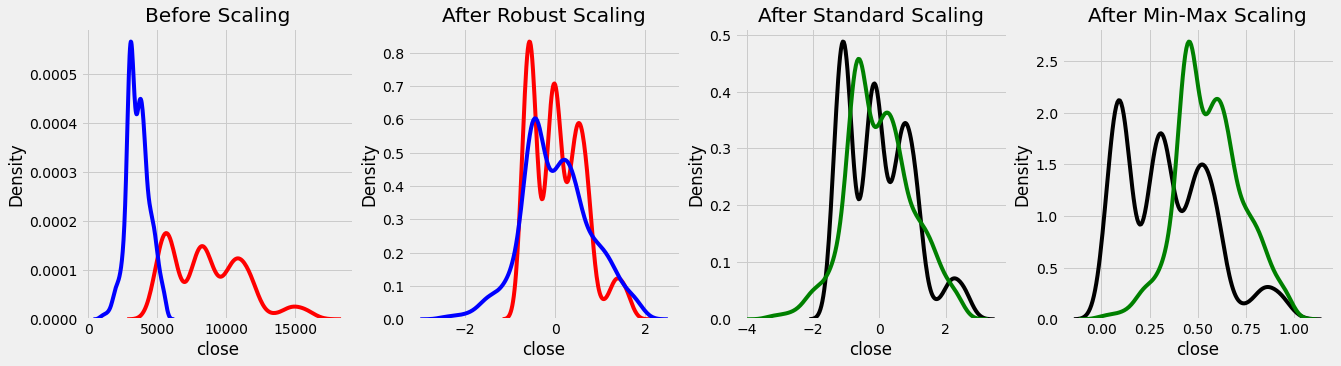

In [79]:
# Importing libraries
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline
matplotlib.style.use('fivethirtyeight')

# data
x = data_subset


scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['close','close1'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['close','close1'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['close','close1'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['close'], ax = ax1, color ='r')
sns.kdeplot(x['close1'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['close'], ax = ax2, color ='red')
sns.kdeplot(robust_df['close1'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['close'], ax = ax3, color ='black')
sns.kdeplot(standard_df['close1'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['close'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['close1'], ax = ax4, color ='g')
plt.show()


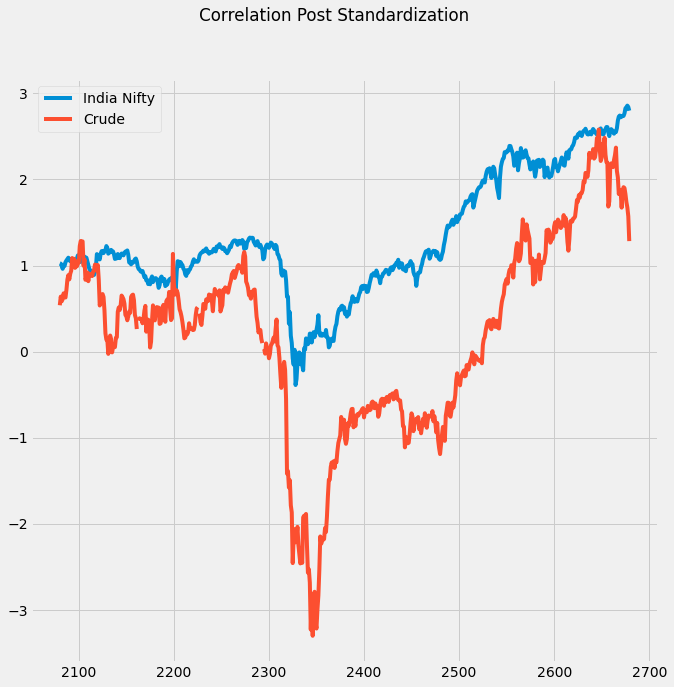

In [84]:
columns=['India Nifty','Crude']
standard_df.columns=columns
standard_df[-600:].plot(figsize=(10,10))
plt.suptitle('Correlation Post Standardization')
plt.show()